Step1: Setup


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Step2: Load the Dataset


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [32]:
df = pd.read_csv('/content/drive/MyDrive/Projects/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Step 4: Explore the Dataset (EDA)

Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

Missing Values:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Descriptive Statistics:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.26472

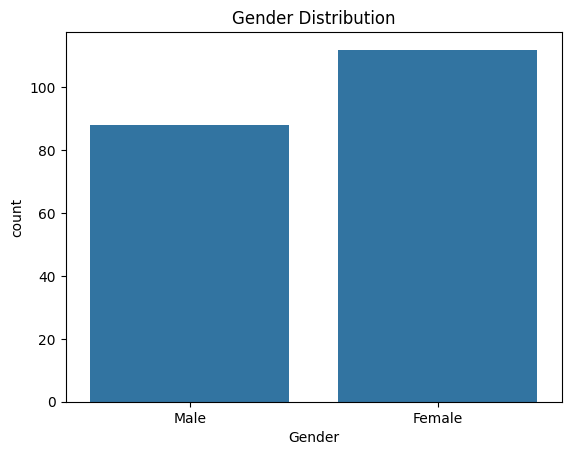

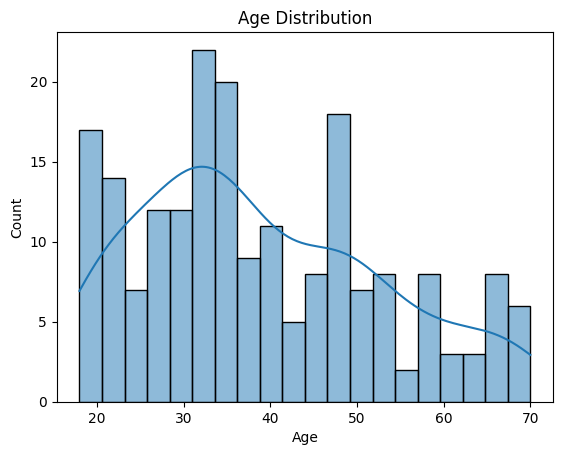

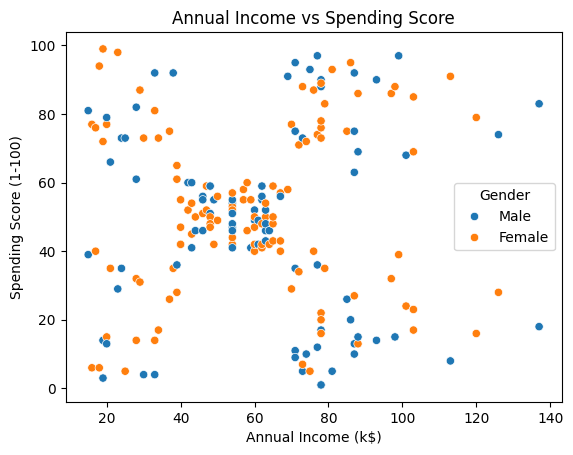

In [33]:
print("Basic Info:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())

print("\nDescriptive Statistics:")
print(df.describe())

# Gender Distribution
sns.countplot(x='Gender', data=df)
plt.title("Gender Distribution")
plt.show()

# Age Distribution
sns.histplot(df['Age'], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()

# Income vs Spending
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, hue='Gender')
plt.title("Annual Income vs Spending Score")
plt.show()

Step 5: Preprocessing

In [34]:
# Convert Gender to numeric
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Drop CustomerID
df_clean = df.drop('CustomerID', axis=1)

# Scale features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_clean)

Step 6: Find Optimal k using Elbow Method

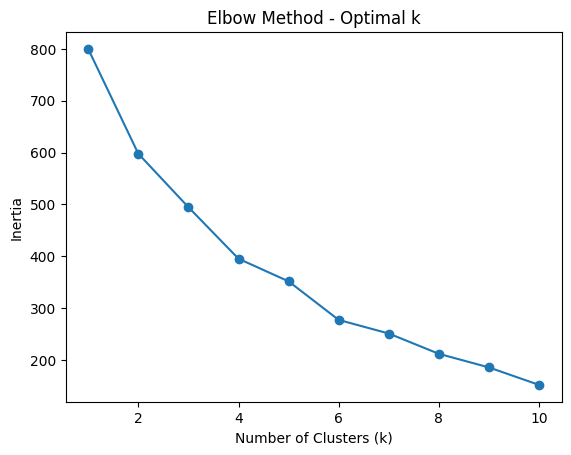

In [35]:
inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method - Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

Step 7: Apply KMeans Clustering

In [36]:
k = 5  # use based on elbow curve
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,0,19,15,39,2
1,2,0,21,15,81,2
2,3,1,20,16,6,4
3,4,1,23,16,77,4
4,5,1,31,17,40,4


Step 8: Visualize Clusters Using PCA

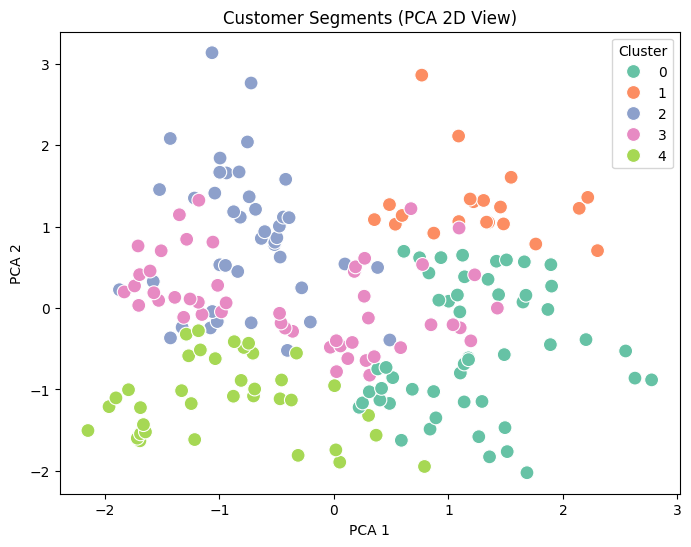

In [37]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=df['Cluster'], palette='Set2', s=100)
plt.title("Customer Segments (PCA 2D View)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title='Cluster')
plt.show()

Step 9: Analyze Clusters

In [38]:
cluster_summary = df.groupby('Cluster').mean()
print("Cluster Summary:")
print(cluster_summary)

Cluster Summary:
         CustomerID    Gender        Age  Annual Income (k$)  \
Cluster                                                        
0         65.333333  0.490196  56.470588           46.098039   
1        159.500000  0.000000  39.500000           85.150000   
2        100.809524  0.000000  28.690476           60.904762   
3        151.510204  1.000000  37.897959           82.122449   
4         50.526316  1.000000  27.315789           38.842105   

         Spending Score (1-100)  
Cluster                          
0                     39.313725  
1                     14.050000  
2                     70.238095  
3                     54.448980  
4                     56.210526  
